In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:/anaconda/pwd/file/exam_data.csv')
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


<h3> NO.1

In [3]:
get = df[['Landsize','Price']]
get = get.columns.tolist()
get

['Landsize', 'Price']

In [4]:
def a(x):
    lis = []
    for i in x:
        a = i
        # tendcy
        mean = df[i].mean()
        Median = df[i].median()
        Modus = df[i].mode()[0]
        #distribusi
        Q1 = df.describe()[i]['25%']
        Q2 = df.describe()[i]['50%']
        Q3 = df.describe()[i]['75%']
        #dispersion
        STD = df[i].std()
        Var= df[i].var()
        Skew = df[i].skew()
        IQR = Q3 - Q1
        r1 = df[i].max()
        r2 = df[i].min()
        rng = r1 - r2
        ret = [a,mean,Median,Modus,STD,Var,IQR,Skew,Q1,Q2,Q3,rng]
        lis.append(ret)
    res = pd.DataFrame(lis,columns = ['col','mean','median','modus','std deviation','variance','skewnes','IQR','Q1','Q2','Q3','Range']).set_index('col')
    return res
a(get)

,mean,median,modus,std deviation,variance,skewnes,IQR,Q1,Q2,Q3,Range
col,,,,,,,,,,,
Landsize,5.584161e+02,440.0,0.0,3990.669241,1.592544e+07,474.0,95.237400,177.0,440.0,651.0,433014.0
Price,1.075684e+06,903000.0,1100000.0,639310.724296,4.087182e+11,680000.0,2.239624,650000.0,903000.0,1330000.0,8915000.0


In [5]:
df['Price'].var()

408718202199.9009

central tendency:
mean
median
mode

dispersion:
std
var
iqr

distribusi
q1
q2
q3

<h3> no.2 </h3>
Carilah data outlier dan beri penjelasan (insight) pada feature/column Distance ! Tambahkan plot untuk menampilkan adanya data outlier!

In [6]:
# data outlier using iqr
def iqr(cols):
    s = df[cols]
    a = pd.DataFrame(s)
    Q1 = a.describe()[cols]['25%']
    Q3 = a.describe()[cols]['75%']
    IQR = Q3 - Q1 
    UF = Q3 + (1.5 * IQR)
    LF= Q1 - (1.5 * IQR)
    
    b = a[(a[cols] < LF) | (a[cols] > UF) ]
    a = a[a[cols] < LF]
    c = a[a[cols] > UF]
    
    return b
iqr('Distance')

,Distance
8741,35.2
8742,25.0
8782,34.7
8786,24.7
8787,24.7
...,...
13540,35.4
13545,31.7
13546,31.7
13547,31.7


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


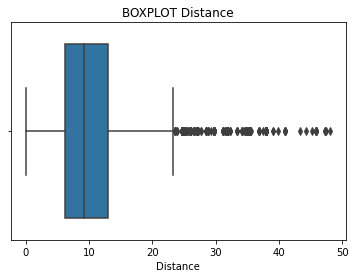

In [7]:
sns.boxplot(df['Distance'])
plt.title('BOXPLOT Distance')
plt.show()

dari 13580 data terdapat 411 data outliers yang berada di upper fence

<h3> NO.3 </h3>
Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column YearBuilt. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!

In [8]:
df['e'] = 1


In [9]:
Q1 = df.describe()['YearBuilt']['25%']
Q3 = df.describe()['YearBuilt']['75%']
IQR = Q3 - Q1 
UF = Q3 + (1.5 * IQR)
LF= Q1 - (1.5 * IQR)
    
year_clear = df[(df['YearBuilt'] > LF) | (df['YearBuilt'] < UF) ]


In [10]:
year_clear

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,e
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,1
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,1
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,1
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,0.0,245.0,210.0,1910.0,Yarra,-37.80240,144.99930,Northern Metropolitan,4019.0,1
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,2.0,256.0,107.0,1890.0,Yarra,-37.80600,144.99540,Northern Metropolitan,4019.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,1
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0,1
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0,1
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0,1


In [11]:
get = year_clear[['YearBuilt','e']].groupby(['YearBuilt'],as_index = False).count()
get

,YearBuilt,e
0,1196.0,1
1,1830.0,1
2,1850.0,4
3,1854.0,1
4,1856.0,1
...,...,...
139,2014.0,100
140,2015.0,65
141,2016.0,58
142,2017.0,18


D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


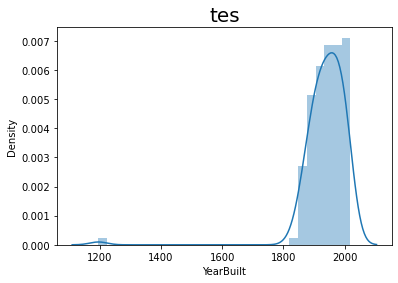

In [12]:
sns.distplot(get['YearBuilt'])
plt.title('Year Built',size = 20)
plt.show()

Dari visula di atas dapat kita ketahui pembangunan rumah mulai nak sejak 18000 sampai tahun sebelum 2000 dan terjadinya penurunan dapat di sebabkan ole pembangunan yang masif sejak 1800an sehingga lahan yang tersedia mulai sedikit dan mengalami penurunan pada YearBuilt

<h3> no.4</h3>
 Tampilkan perkembangan rata-rata harga (price) rumah berdasarkan tahun pembangunan rumah (Year) menggunakan plot yang tepat! Jelaskan (insight) perkembangan rata-rata harga rumah dari plot yang Anda buat!



In [26]:
get = year_clear[['Price','YearBuilt']]
get.groupby(['YearBuilt'],as_index = False).mean()

,YearBuilt,Price
0,1196.0,1.200000e+06
1,1830.0,8.550000e+05
2,1850.0,1.179500e+06
3,1854.0,3.310000e+06
4,1856.0,2.260000e+06
...,...,...
139,2014.0,9.219150e+05
140,2015.0,1.231485e+06
141,2016.0,1.523655e+06
142,2017.0,1.037972e+06


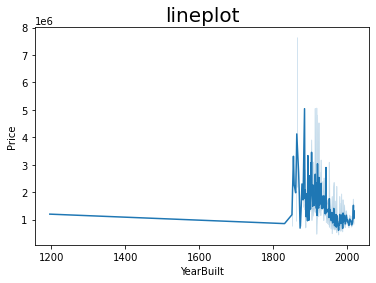

In [27]:
sns.lineplot(data = get,x='YearBuilt',y='Price')
plt.title('lineplot',size=20)
plt.show()

pada visual di atas dapat kita lihat ren pembangunan rumah yang mulai terjadi di tahun 1800an mengalami kenaikan dan penuruna setiap tahunnya

<h3> NO.5 </h3>
Di antara Landsize, Distance, & Rooms, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column Price? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan setelah mengetahui nilai korelasi tersebut?

In [15]:
get5 = df[['Landsize','Distance','Rooms','Price']]
get5.corr()

,Landsize,Distance,Rooms,Price
Landsize,1.000000,0.025004,0.025678,0.037507
Distance,0.025004,1.000000,0.294203,-0.162522
Rooms,0.025678,0.294203,1.000000,0.496634
Price,0.037507,-0.162522,0.496634,1.000000


In [16]:
get5.corr(method = 'spearman')

,Landsize,Distance,Rooms,Price
Landsize,1.000000,0.417379,0.485742,0.327200
Distance,0.417379,1.000000,0.351416,-0.129990
Rooms,0.485742,0.351416,1.000000,0.539886
Price,0.327200,-0.129990,0.539886,1.000000


In [17]:
get5.corr(method = 'kendall')

,Landsize,Distance,Rooms,Price
Landsize,1.000000,0.290712,0.393809,0.229082
Distance,0.290712,1.000000,0.266915,-0.089653
Rooms,0.393809,0.266915,1.000000,0.428875
Price,0.229082,-0.089653,0.428875,1.000000


In [18]:
get5.corr(method = 'pearson')

,Landsize,Distance,Rooms,Price
Landsize,1.000000,0.025004,0.025678,0.037507
Distance,0.025004,1.000000,0.294203,-0.162522
Rooms,0.025678,0.294203,1.000000,0.496634
Price,0.037507,-0.162522,0.496634,1.000000


nilai korelasi tertinggi berada pada Price dengan Rooms pada kendall correlation, karena jika rumha memiliki banyak ruangan maka membuthuhkan cost dan lahan yang lebih untuk membangunnya sehingga harga menjadi lebih mahal 

<h3> no.6 </h3>
RegionName yang rata-rata harga (Price) propertinya paling tinggi, serta tampilkan RegionName dan rata-rata harga rumah dalam bentuk Barplot! Lalu, di region yang memiliki rata-rata harga properti tertinggi, carilah

In [19]:
def avg(col):
    get6[col]

In [20]:
get6 = df[['Price','Regionname']]
get = get6.groupby(['Regionname'],as_index = False).mean()
get
get.sort_values(['Price'], axis = 0,ascending =False)

,Regionname,Price
5,Southern Metropolitan,1.372963e+06
0,Eastern Metropolitan,1.104080e+06
4,South-Eastern Metropolitan,9.229438e+05
2,Northern Metropolitan,8.981711e+05
6,Western Metropolitan,8.664205e+05
1,Eastern Victoria,6.999808e+05
3,Northern Victoria,5.948293e+05
7,Western Victoria,3.975234e+05


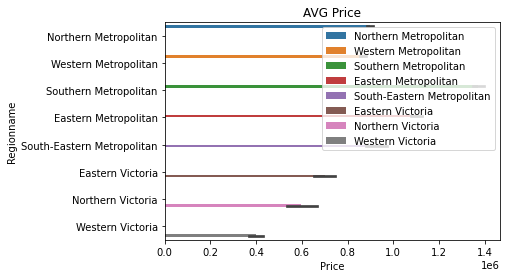

In [21]:
sns.barplot(data=get6,x='Price',y='Regionname',hue='Regionname')
plt.title("AVG Price")
plt.legend(loc=1)
plt.show()

nilai penjualan rata rata berada di region Southern Metropolitan dan harga yang berada di daerah victoria lebih rendah di bandingkan dengan metropolitan

In [22]:
data1= df[df['Regionname'] == 'Southern Metropolitan']
data2= data1[['Regionname','CouncilArea','Type','Method','Price','e']]
data2

,Regionname,CouncilArea,Type,Method,Price,e
78,Southern Metropolitan,Port Phillip,h,S,1275000.0,1
79,Southern Metropolitan,Port Phillip,h,S,1455000.0,1
80,Southern Metropolitan,Port Phillip,h,PI,2850000.0,1
81,Southern Metropolitan,Port Phillip,h,S,1850000.0,1
82,Southern Metropolitan,Port Phillip,h,S,1436000.0,1
...,...,...,...,...,...,...
13524,Southern Metropolitan,NaN,h,S,1365000.0,1
13538,Southern Metropolitan,NaN,h,S,1490000.0,1
13553,Southern Metropolitan,NaN,h,S,2720000.0,1
13554,Southern Metropolitan,NaN,h,S,1715000.0,1


In [23]:
cp = data2[['CouncilArea','Price']]
cp.groupby(['CouncilArea'],as_index = False).mean().head(5)

,CouncilArea,Price
0,Bayside,1.652168e+06
1,Boroondara,1.646740e+06
2,Glen Eira,1.069279e+06
3,Kingston,9.909647e+05
4,Melbourne,9.209085e+05


5 council area dengan hraga rata rata tertingi di Southern Metropolitan

In [24]:
cp = data2[['Type','Price']]
cp.groupby(['Type'],as_index = False).mean().head(5)

,Type,Price
0,h,1.802241e+06
1,t,1.205404e+06
2,u,6.648600e+05


5 tipe rumah dengan hraga rata rata tertingi di Southern Metropolitan

In [25]:
cp = data2[['Method','Price']]
cp.groupby(['Method'],as_index = False).mean().head(5)

,Method,Price
0,PI,1.392811e+06
1,S,1.385983e+06
2,SA,1.310289e+06
3,SP,1.113544e+06
4,VB,1.455222e+06


5 Method dengan hraga rata rata tertingi di Southern Metropolitan

<h3> NO.7<h/3>
    Lakukan Uji Hipotesis untuk menguji apakah ada perbedaan harga properti antar Region Name!

dari data yang sudah di analisa bahwa hipotesis yang di sebutkan itu benar
karena pada Data visual barplot AVG Price dapat kita lihat bahwa tiap Region name memiliki harga yang berbeda terutama perbedaan yang paling terlihat adanya perbedaan pada Victoria dan metropolitan sehingga hipotesis benar